## Accuracy of GLASS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import pymaster as nmt
import matplotlib as mpl


nside = 1024
Nsim = 100

savefigs=True
pathFIGS_GLASS = f'../figs_thesis/GLASS_accuracy/'

maskSALMO = hp.ud_grade(hp.read_map(f'../maps_for_salmo/DECALS_mask.fits'), nside)

b = np.append(2**(np.arange(int(np.log(2*nside) / np.log(2)+1)))[1:], 3*nside)
bins = nmt.NmtBin.from_edges(b[:-1], b[1:])
ells = bins.get_effective_ells()

## workspace
wsp = nmt.NmtWorkspace()
f = nmt.NmtField(maskSALMO, None, spin=0)
wsp.compute_coupling_matrix(f,f, bins)

cls_true = np.load('../theory/cls_theory_ccl.npy')
cls_theo = wsp.decouple_cell(wsp.couple_cell([cls_true]))[0]   ## coupled/decoupled power spectrum

### varying $n_\text{corr}$

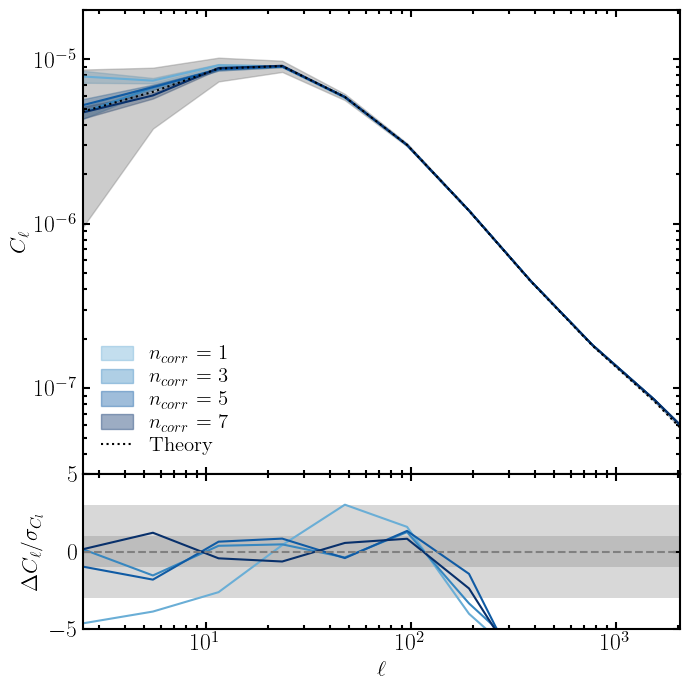

In [2]:
path = f'/vol/aleph/data/mheld/salmo/GLASS_simulations/'
paths_list = [f'{path}1024_ncorr1_dx140/1024/', f'{path}1024/', f'{path}1024_ncorr5_dx140/', f'{path}1024_ncorr7_dx140/']
n_corr_list = [1,3,5, 7]

cmap = mpl.colormaps.get_cmap('Blues')(np.linspace(0.5,1,len(n_corr_list)))

fig = plt.figure(figsize=(7,7))
fig_grid = fig.add_gridspec(1,1)

plots_grid = fig_grid[0,0].subgridspec(2,1,hspace=0, height_ratios=[3,1])
axs = plots_grid.subplots()

for i, (n_corr, pathGLASS) in enumerate(zip(n_corr_list, paths_list)):
    cls = pd.read_csv(f'{pathGLASS}ClsGLASS/mean_Cls.data')


    ells = cls['ell'].to_numpy()
    cls_mean = cls[f'Cls'].to_numpy()
    cls_unc = cls[f'Cls unc'].to_numpy()

    

    axs[0].plot(ells, cls_mean, color=cmap[i])
    axs[0].fill_between(ells, cls_mean- cls_unc, cls_mean+ cls_unc, color=cmap[i], alpha=0.4, label=f'$n_{{corr}}$ = {n_corr}')
    
    dev = (cls_theo - cls_mean) / cls_unc
    axs[1].plot(ells, dev, color=cmap[i])
axs[0].plot(ells, cls_theo, color='black', linestyle=':', label='Theory')
axs[0].fill_between(ells, cls_theo- cls_unc*np.sqrt(Nsim), cls_theo+ cls_unc*np.sqrt(Nsim), color='grey', alpha=0.4)
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_ylabel(f'$C_\\ell$', fontsize=16)
axs[0].legend(loc='lower left', frameon=False)
axs[0].set_xlim(ells[0], 2*nside)
axs[0].set_ylim(3e-8, 2e-5)



axs[1].axhline(0,ls='--', color='grey')
axs[1].set_ylabel('$\\Delta C_\\ell /\\sigma_{C_l}$', fontsize=16)
axs[1].fill_between(y1=-1, y2=1, x=ells, alpha=0.3, color='grey', edgecolor=None)
axs[1].fill_between(y1=-3, y2=3, x=ells, alpha=0.3, color='grey', edgecolor=None)
axs[1].set_ylim(-5,5)
axs[1].set_xlabel(f'$\\ell$', fontsize=16)
axs[1].set_xlabel(f'$\\ell$', fontsize=16)
axs[1].set_xscale('log')
axs[1].set_xlim(ells[0],2*nside)
plt.tight_layout()
if savefigs:
    plt.savefig(f'{pathFIGS_GLASS}accuracy_cls_varyncorr.png')
plt.show()

### varying dx

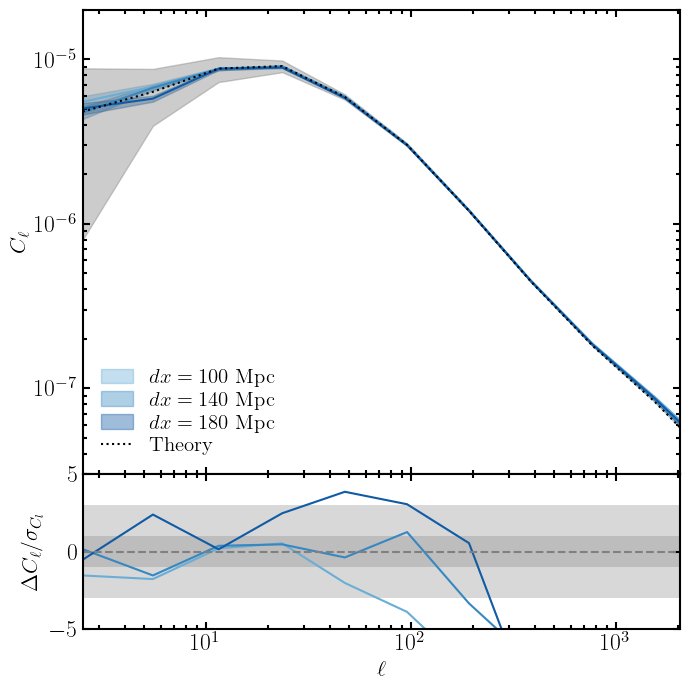

In [3]:
path = f'/vol/aleph/data/mheld/salmo/GLASS_simulations/'
paths_list = [f'{path}1024_ncorr3_dx100/', f'{path}1024/', f'{path}1024_ncorr3_dx180/']
dx_list = [100,140,180]

cmap = mpl.colormaps.get_cmap('Blues')(np.linspace(0.5,1,len(n_corr_list)))

fig = plt.figure(figsize=(7,7))
fig_grid = fig.add_gridspec(1,1)

plots_grid = fig_grid[0,0].subgridspec(2,1,hspace=0, height_ratios=[3,1])
axs = plots_grid.subplots()

for i, (dx, pathGLASS) in enumerate(zip(dx_list, paths_list)):
    cls = pd.read_csv(f'{pathGLASS}ClsGLASS/mean_Cls.data')


    ells = cls['ell'].to_numpy()
    cls_mean = cls[f'Cls'].to_numpy()
    cls_unc = cls[f'Cls unc'].to_numpy()

    

    axs[0].plot(ells, cls_mean, color=cmap[i])
    axs[0].fill_between(ells, cls_mean- cls_unc, cls_mean+ cls_unc, color=cmap[i], alpha=0.4, label=f'$dx = {dx}$ Mpc')
    
    dev = (cls_theo - cls_mean) / cls_unc
    axs[1].plot(ells, dev, color=cmap[i])
axs[0].plot(ells, cls_theo, color='black', linestyle=':', label='Theory')
axs[0].fill_between(ells, cls_theo- cls_unc*np.sqrt(Nsim), cls_theo+ cls_unc*np.sqrt(Nsim), color='grey', alpha=0.4)
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_ylabel(f'$C_\\ell$', fontsize=16)
axs[0].legend(loc='lower left', frameon=False)
axs[0].set_xlim(ells[0], 2*nside)
axs[0].set_ylim(3e-8, 2e-5)



axs[1].axhline(0,ls='--', color='grey')
axs[1].set_ylabel('$\\Delta C_\\ell /\\sigma_{C_l}$', fontsize=16)
axs[1].fill_between(y1=-1, y2=1, x=ells, alpha=0.3, color='grey', edgecolor=None)
axs[1].fill_between(y1=-3, y2=3, x=ells, alpha=0.3, color='grey', edgecolor=None)
axs[1].set_ylim(-5,5)
axs[1].set_xlabel(f'$\\ell$', fontsize=16)
axs[1].set_xlabel(f'$\\ell$', fontsize=16)
axs[1].set_xscale('log')
axs[1].set_xlim(ells[0],2*nside)
plt.tight_layout()
if savefigs:
    plt.savefig(f'{pathFIGS_GLASS}accuracy_cls_varydx.png')
plt.show()